In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data['Education'].unique()

array([17, 10, 12, 14, 13, 16, 15, 18, 11], dtype=int64)

In [5]:
colnames = list(data.columns)

In [6]:
predictors = colnames[:4]

In [7]:
target = colnames[4]

In [8]:
data['is_train'] = np.random.uniform(0, 1, len(data))<= 0.75
data['is_train']

0      False
1       True
2       True
3      False
4       True
       ...  
395     True
396     True
397     True
398     True
399     True
Name: is_train, Length: 400, dtype: bool

In [9]:
train,test = data[data['is_train'] == True],data[data['is_train']==False]
train,test

(     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
 1    11.22        111      48           16         260     83      Good   65   
 2    10.06        113      35           10         269     80    Medium   59   
 4     4.15        141      64            3         340    128       Bad   38   
 5    10.81        124     113           13         501     72       Bad   78   
 6     6.63        115     105            0          45    108    Medium   71   
 ..     ...        ...     ...          ...         ...    ...       ...  ...   
 395  12.57        138     108           17         203    128      Good   33   
 396   6.14        139      23            3          37    120    Medium   55   
 397   7.41        162      26           12         368    159    Medium   40   
 398   5.94        100      79            7         284     95       Bad   50   
 399   9.71        134      37            0          27    120      Good   49   
 
      Education Urban   US

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train,test = train_test_split(data,test_size = 0.2)
train,test

(     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
 52    7.91        153      40            3         112    129       Bad   39   
 287   6.88         95      44            4         208     72       Bad   44   
 132   9.54        125      87            9         232    136      Good   72   
 157  10.21        121      58            8         249     90    Medium   48   
 229  11.19         98     104            0         404     72    Medium   27   
 ..     ...        ...     ...          ...         ...    ...       ...  ...   
 264   6.95        128      29            5         324    159      Good   31   
 254   9.58        108     104           23         353    129      Good   37   
 93    8.86        145      30            0          67    104    Medium   55   
 279   3.42        141      57           13         376    158    Medium   64   
 107   8.55        134     107            0         104    108    Medium   60   
 
      Education Urban   US

In [12]:
from sklearn.tree import  DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [14]:
model

DecisionTreeClassifier(criterion='entropy')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  is_train     400 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(3)
memory usage: 34.9+ KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


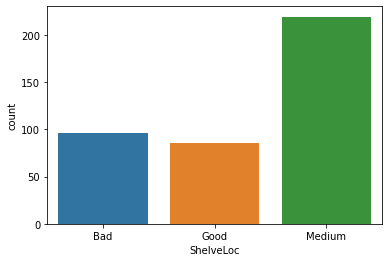

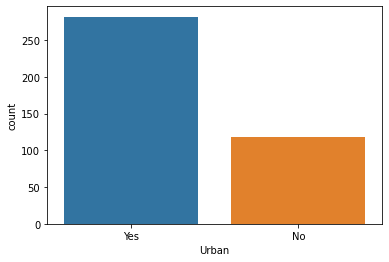

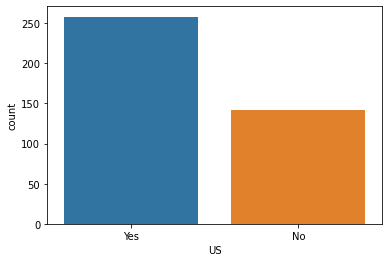

In [17]:
# checking count of categories for categorical columns
sns.countplot(data['ShelveLoc'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

sns.countplot(data['US'])
plt.show()

In [18]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

<AxesSubplot:xlabel='Sales', ylabel='count'>

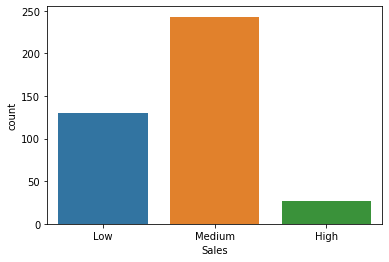

In [19]:
sns.countplot(data['Sales'])

In [20]:
data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [62]:
# Converting other attributes into categories
data['CompPrice'] = pd.cut(x=data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

data['Income'] = pd.cut(x=data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

data['Advertising'] = pd.cut(x=data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

data['Population'] = pd.cut(x=data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

data['Price'] = pd.cut(x=data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

data['Age'] = pd.cut(x=data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

data['Education'] = pd.cut(x=data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [63]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_train
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes,False
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes,True
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes,True
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes,False
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes,True
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes,True
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes,True
398,Low,Medium,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes,True


In [69]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Sales'] = label_encoder.fit_transform(data['Sales'])
data['CompPrice'] = label_encoder.fit_transform(data['CompPrice'])
data['Income'] = label_encoder.fit_transform(data['Income'])
data['Advertising'] = label_encoder.fit_transform(data['Advertising'])
data['Population'] = label_encoder.fit_transform(data['Population'])
data['Price'] = label_encoder.fit_transform(data['Price'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_train
0,2,0,0,2,2,2,0,1,0,1,1,False
1,2,2,2,2,2,2,1,0,1,1,1,True
2,2,2,1,2,2,2,2,2,1,1,1,True
3,2,2,0,1,0,2,2,2,2,1,1,False
4,1,0,2,1,0,2,0,1,2,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1,True
396,2,0,1,1,1,2,2,2,1,0,1,True
397,2,0,1,2,0,0,2,1,0,1,1,True
398,1,2,0,1,2,2,0,2,1,1,1,True


In [70]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_train
Sales,1.000000,0.072262,-0.011800,0.084403,0.059900,0.118394,0.167722,0.032237,-0.015480,0.015228,0.014175,0.037297
CompPrice,0.072262,1.000000,-0.067776,0.023890,-0.099953,0.283602,-0.032907,-0.020228,0.061327,-0.080875,-0.022295,0.029892
Income,-0.011800,-0.067776,1.000000,0.022482,0.077719,-0.031260,0.035383,0.096848,-0.023920,-0.037049,-0.037854,-0.003515
Advertising,0.084403,0.023890,0.022482,1.000000,0.042640,0.066699,0.050442,-0.025986,-0.027225,-0.045881,0.425591,-0.021865
Population,0.059900,-0.099953,0.077719,0.042640,1.000000,-0.001096,0.008897,-0.023286,0.004790,0.076840,0.001007,-0.034762
Price,0.118394,0.283602,-0.031260,0.066699,-0.001096,1.000000,-0.002225,0.038107,0.040300,0.004418,0.039251,0.022513
ShelveLoc,0.167722,-0.032907,0.035383,0.050442,0.008897,-0.002225,1.000000,0.016673,-0.022060,-0.063978,-0.039760,-0.022541
Age,0.032237,-0.020228,0.096848,-0.025986,-0.023286,0.038107,0.016673,1.000000,0.018913,-0.052661,0.063224,-0.036014
Education,-0.015480,0.061327,-0.023920,-0.027225,0.004790,0.040300,-0.022060,0.018913,1.000000,-0.001823,0.030013,-0.069646
Urban,0.015228,-0.080875,-0.037049,-0.045881,0.076840,0.004418,-0.063978,-0.052661,-0.001823,1.000000,0.047085,0.031650


In [71]:
# Dividing data into independent variables and dependent variable
x = data.iloc[:,1:]
y = data['Sales']

In [72]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_train
0,0,0,2,2,2,0,1,0,1,1,False
1,2,2,2,2,2,1,0,1,1,1,True
2,2,1,2,2,2,2,2,1,1,1,True
3,2,0,1,0,2,2,2,2,1,1,False
4,0,2,1,0,2,0,1,2,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1,True
396,0,1,1,1,2,2,2,1,0,1,True
397,0,1,2,0,0,2,1,0,1,1,True
398,2,0,1,2,2,0,2,1,1,1,True


In [73]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [74]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=40)

In [75]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_train
290,2,0,2,0,2,2,1,1,0,1,True
336,0,1,1,1,0,0,1,0,1,0,False
212,0,2,2,0,2,2,2,1,1,1,True
296,2,1,2,1,2,1,0,0,1,1,False
10,2,0,1,1,2,0,1,1,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...
306,2,1,1,1,2,2,2,1,1,1,False
165,0,2,1,1,0,0,1,0,1,1,True
7,0,0,2,0,2,1,0,1,1,1,True
219,2,0,2,0,2,1,2,0,1,1,True


In [76]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_train
132,2,0,1,2,0,1,0,1,1,1,True
390,2,0,1,1,2,2,0,1,1,1,True
310,0,2,0,0,0,2,2,1,1,1,True
3,2,0,1,0,2,2,2,2,1,1,False
248,2,2,1,1,2,2,0,1,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...
215,2,0,2,2,0,0,0,1,1,1,True
314,0,1,2,2,2,1,0,2,1,1,False
259,2,1,2,0,2,0,0,1,0,1,True
49,0,0,1,1,0,1,1,0,1,0,True


In [77]:
y_train

290    2
336    1
212    0
296    2
10     2
      ..
306    1
165    1
7      2
219    2
326    1
Name: Sales, Length: 268, dtype: int32

In [78]:
y_test

132    2
390    1
310    2
3      2
248    1
      ..
215    1
314    2
259    1
49     2
227    2
Name: Sales, Length: 132, dtype: int32

In [80]:
#Building Decision Tree Classifier using Entropy Criteria

In [81]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

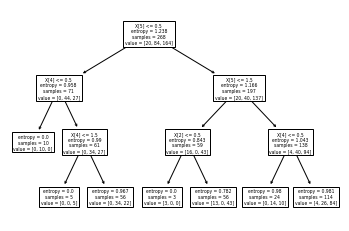

In [82]:
#PLot the decision tree
tree.plot_tree(model);

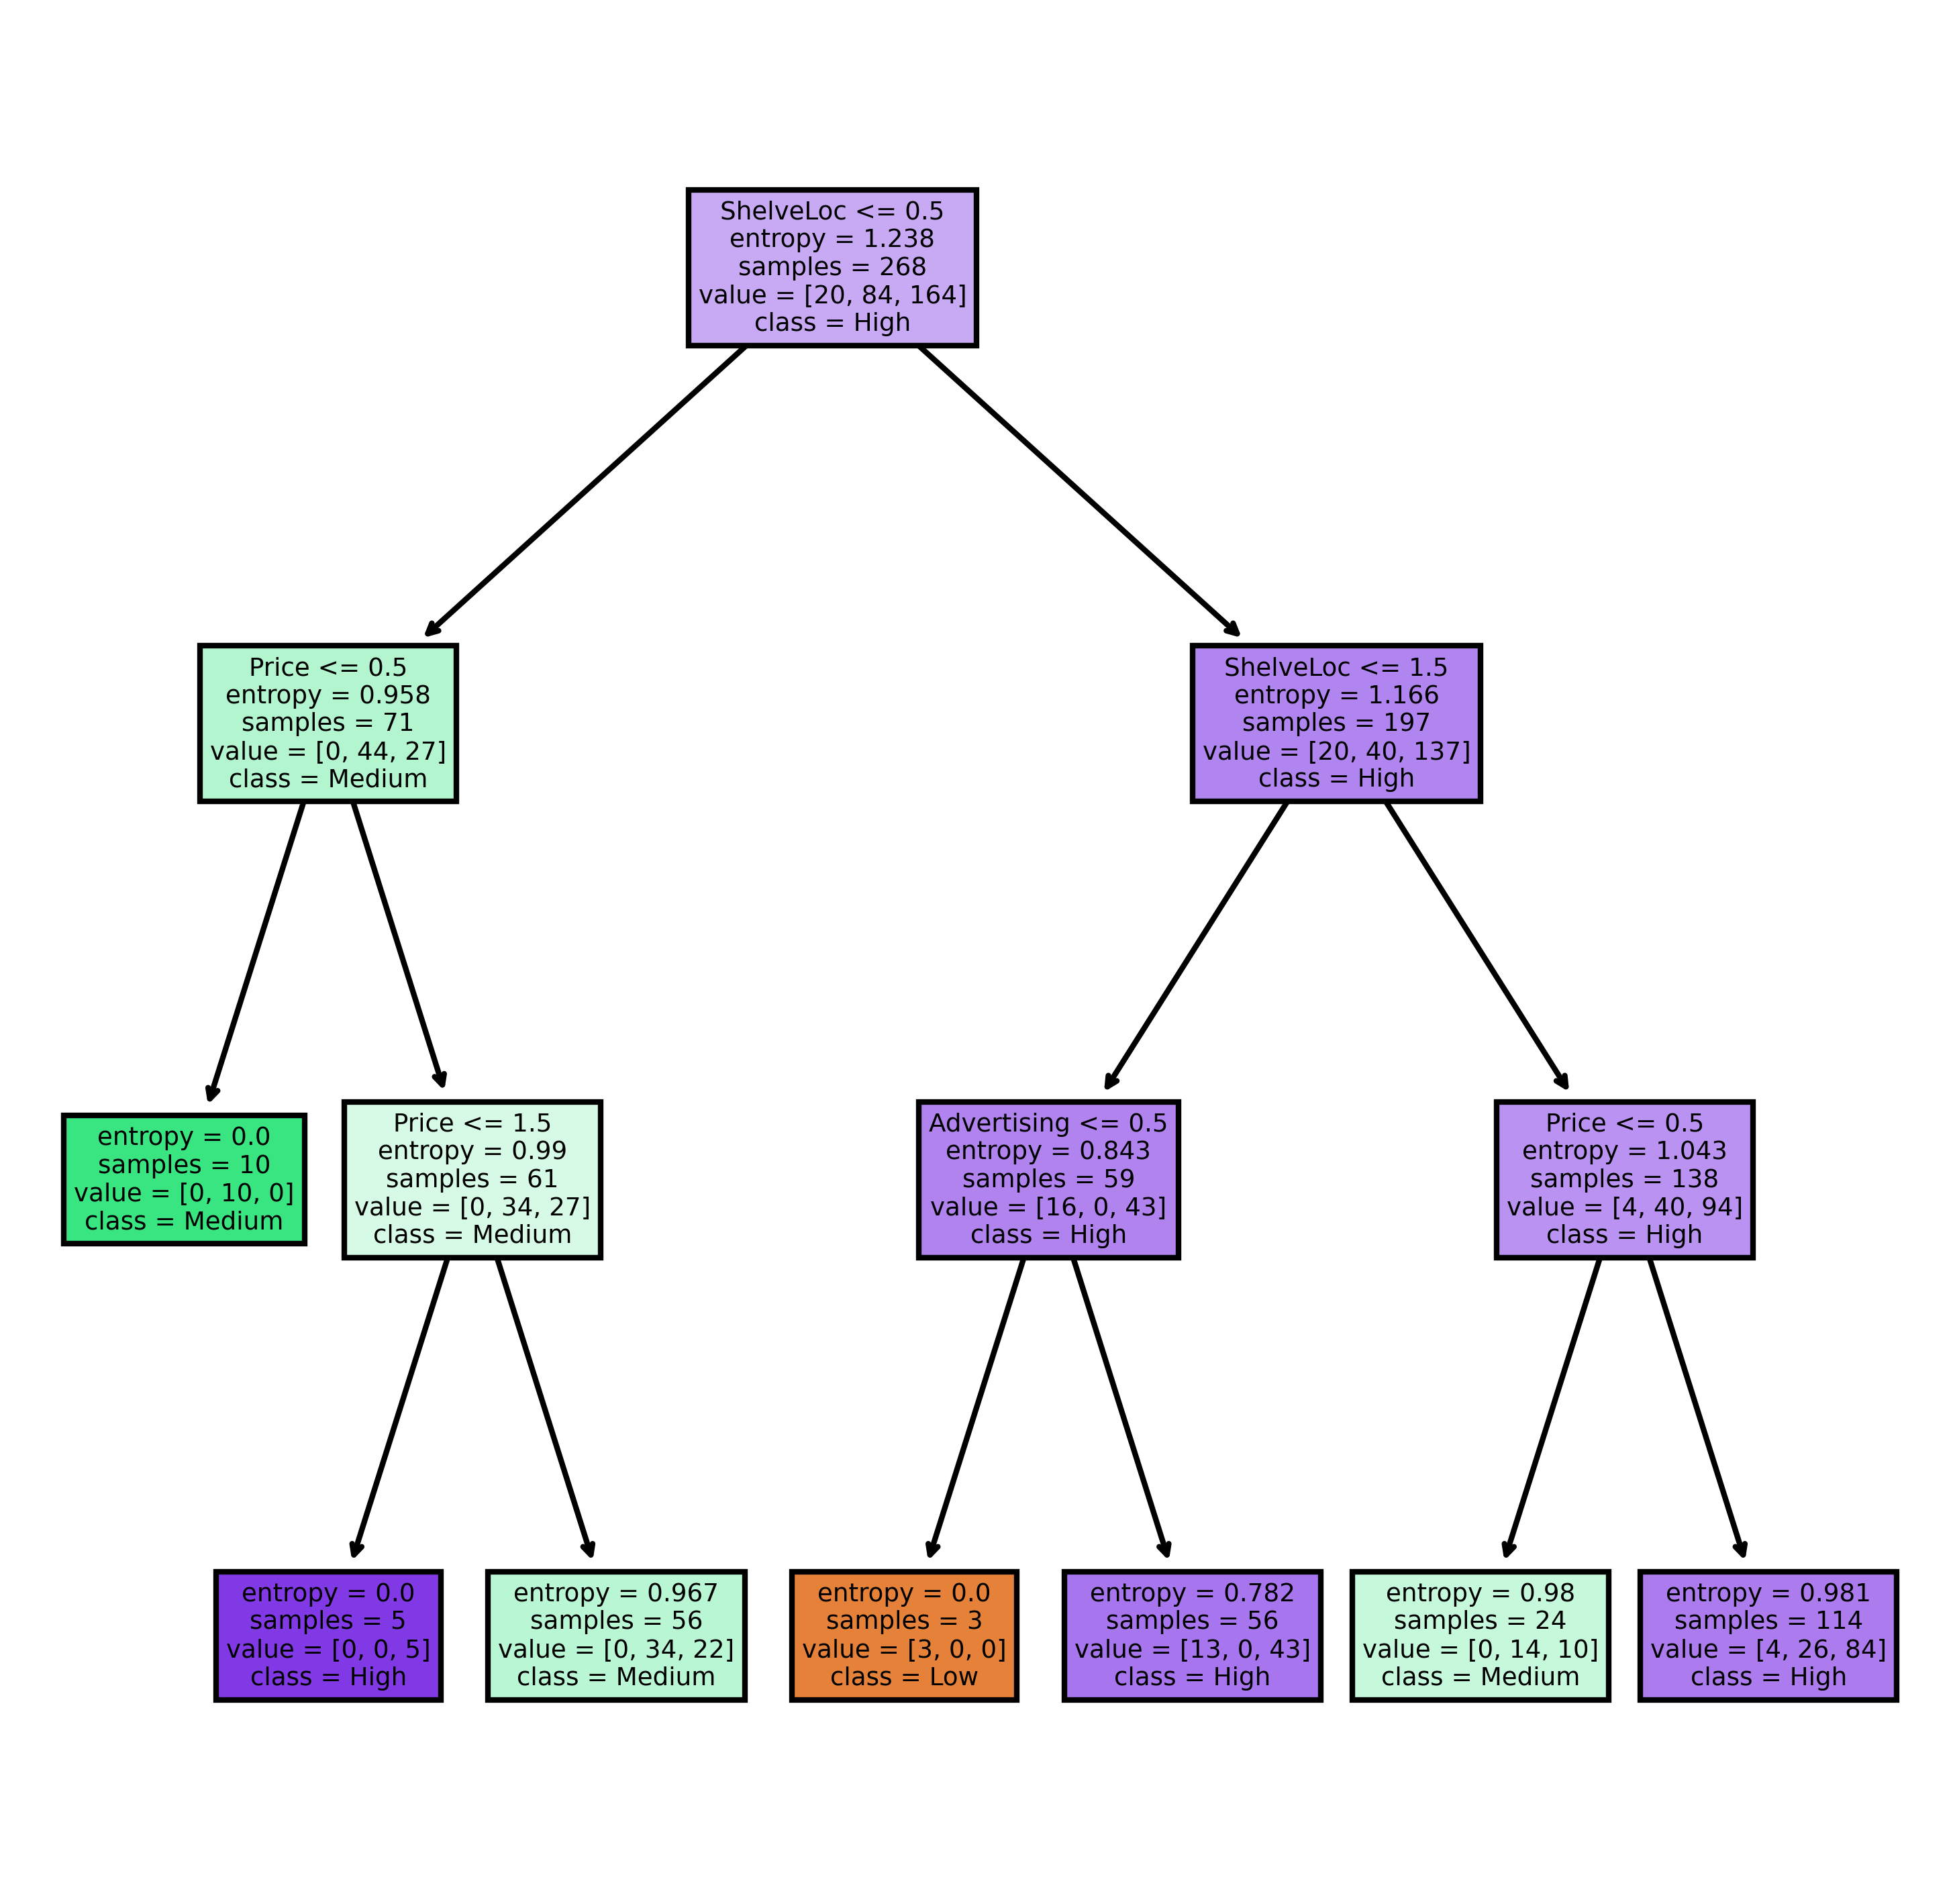

In [83]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [84]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    93
1    38
0     1
dtype: int64

In [85]:
preds

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [86]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,27,19
2,1,11,67


In [87]:
# Accuracy 
np.mean(preds==y_test)

0.7121212121212122

In [88]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [89]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [90]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

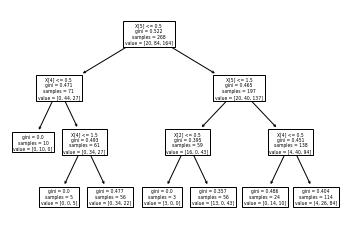

In [91]:
# Plotting Decision tree
tree.plot_tree(model_gini);

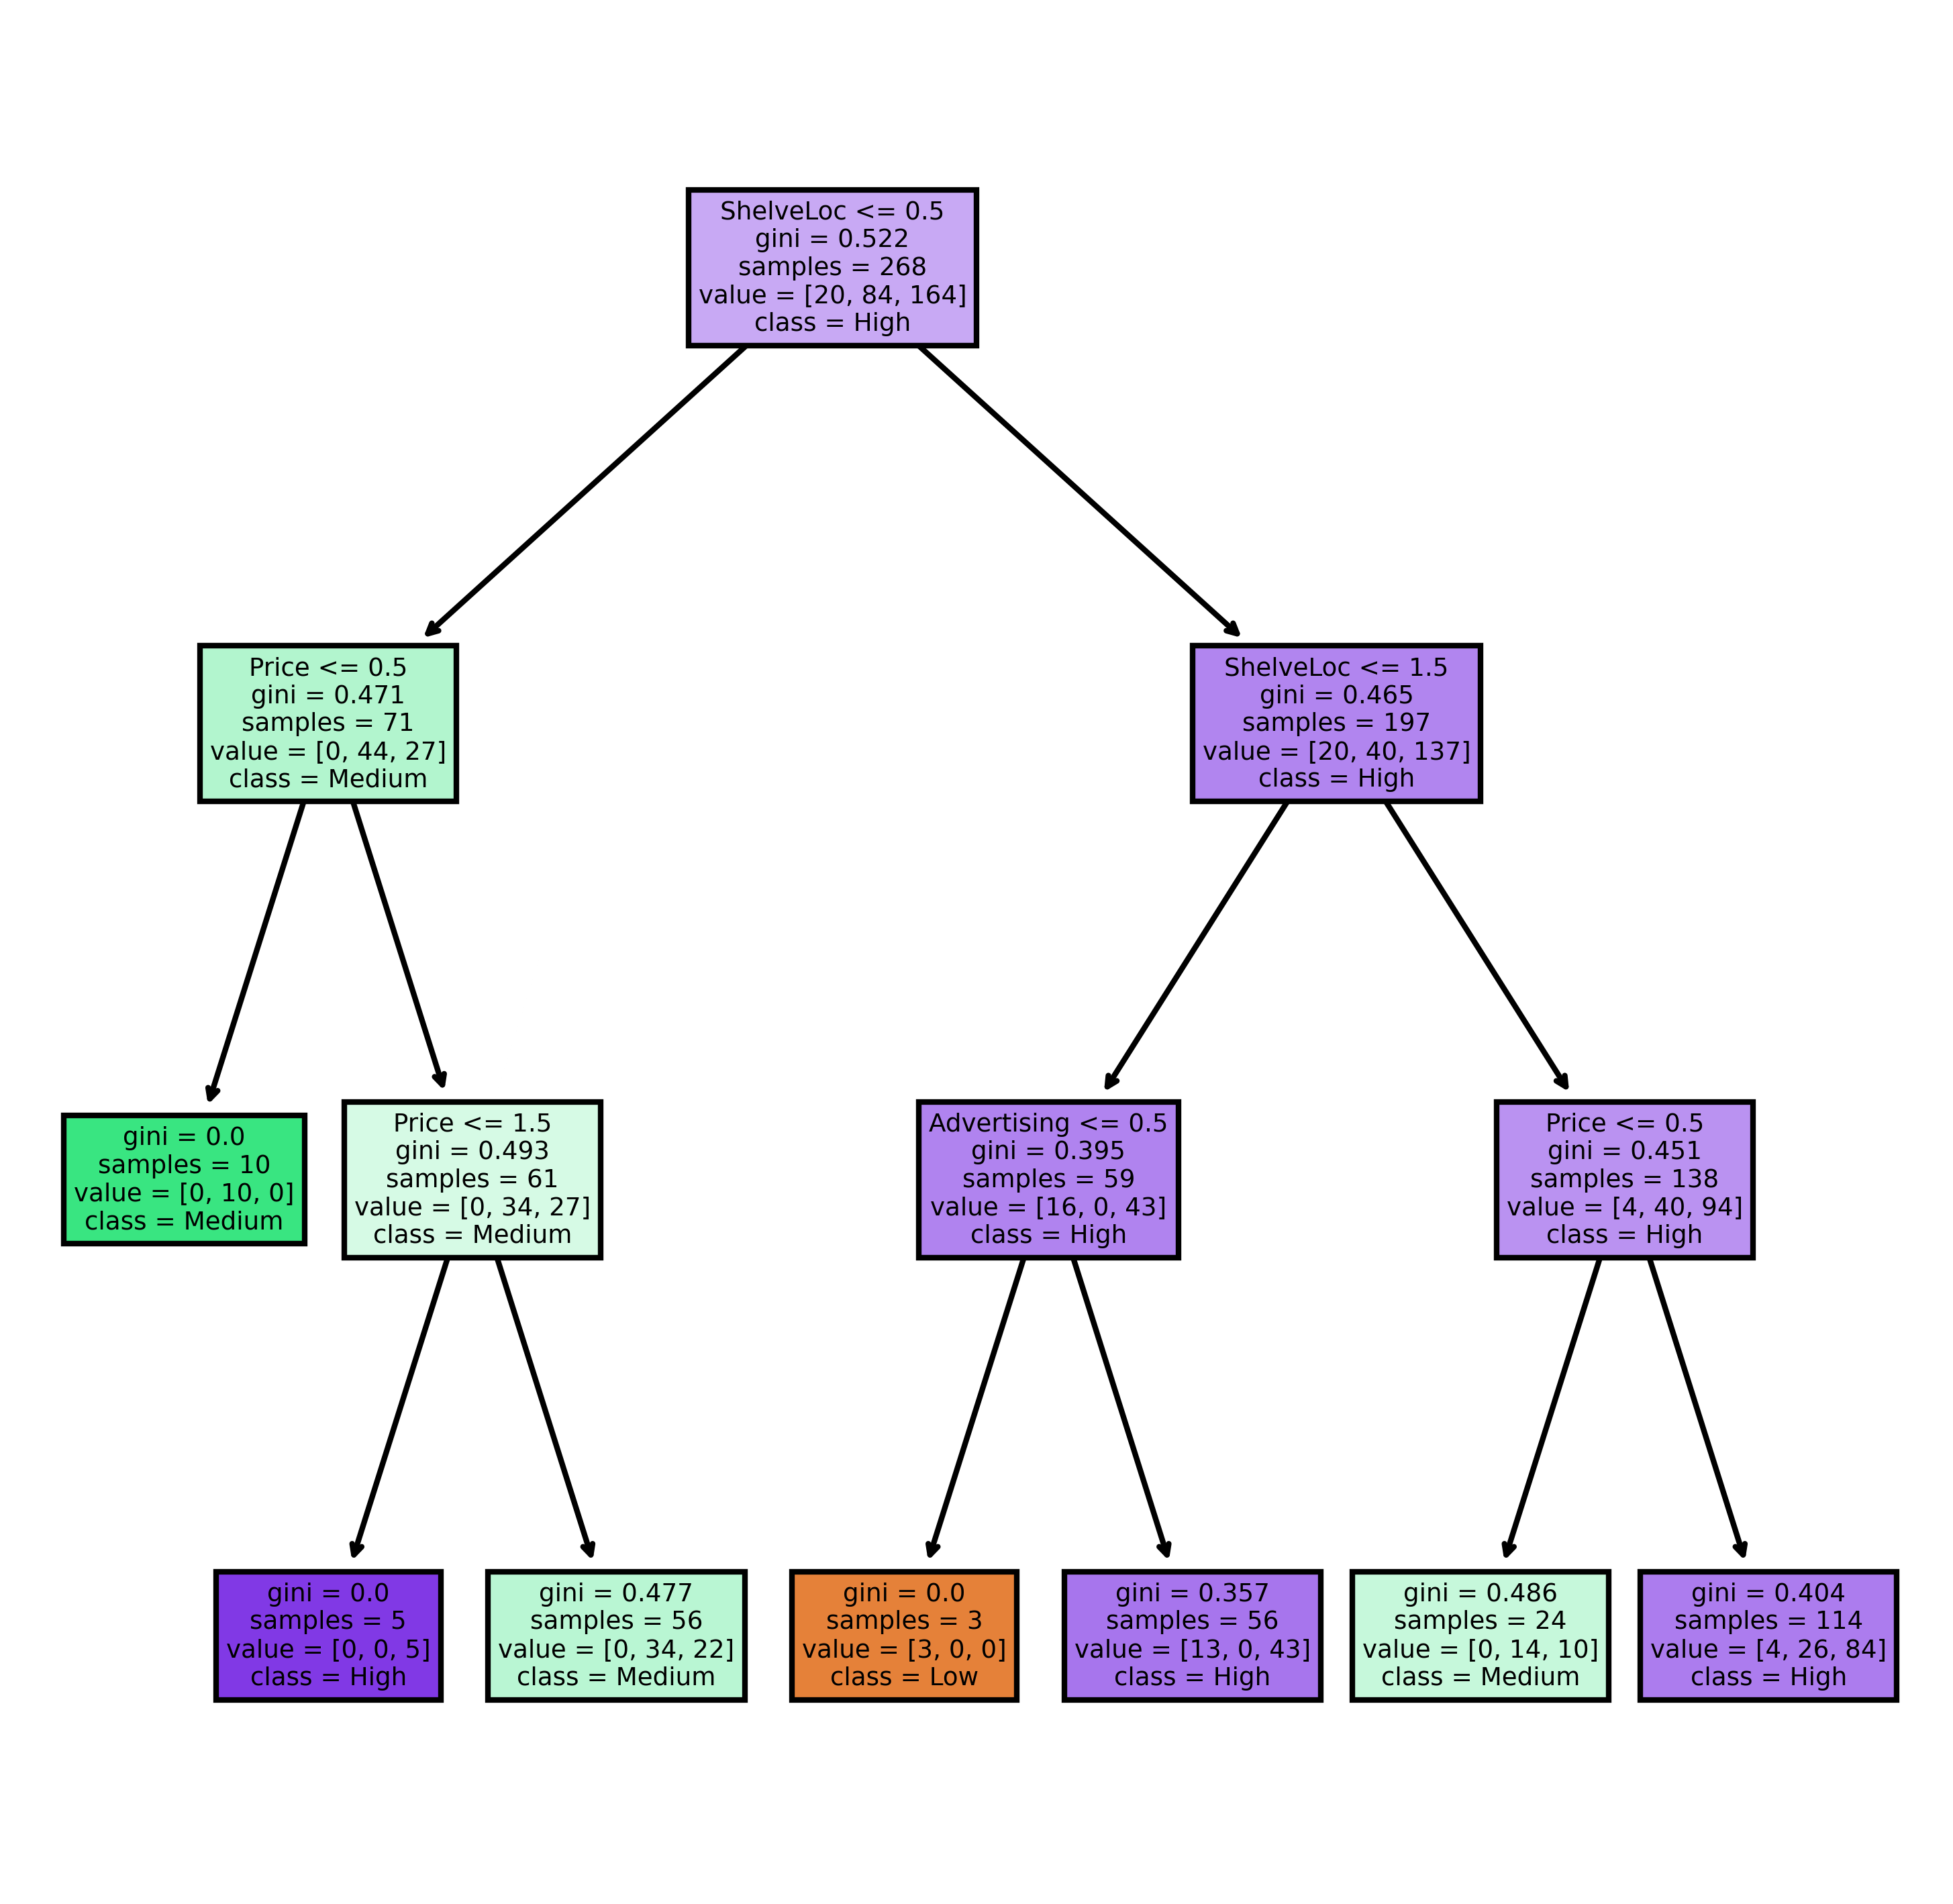

In [92]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [93]:
# Predicting Data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

2    93
1    38
0     1
dtype: int64

In [94]:
preds

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [95]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,27,19
2,1,11,67


In [96]:
# Checking accuracy of model
model_gini.score(x_test, y_test)

0.7121212121212122